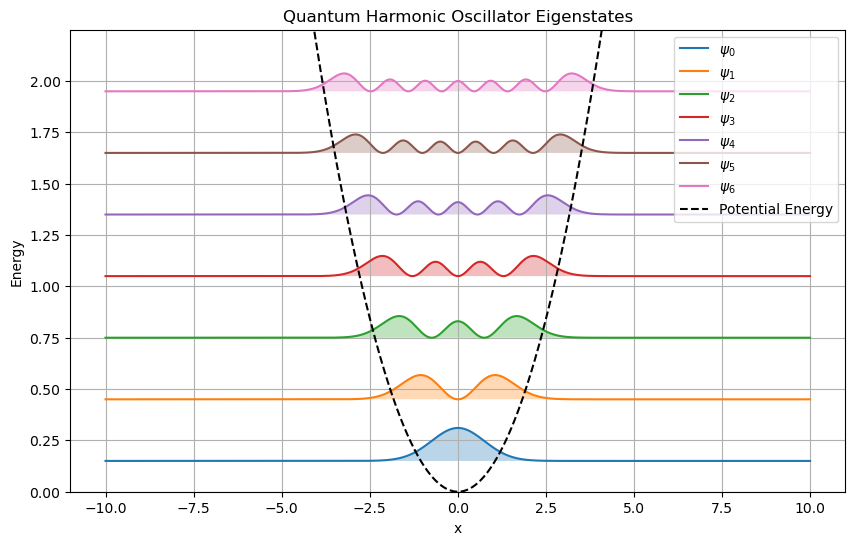

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_quantum_harmonic_oscillator(x_min, x_max, dx, m=1, w=1, x_0=0):
    '''Function to compute the matrix elements, eigenvalues, 
    and eigenvectors of the Hamiltonian of a particle in a harmonic
    potential within a box defined by (x_min, x_max, dx).
    m is the mass of the particle and w is the frequency associated 
    with the harmonic potential.'''
    
    h_bar = 1  # Planck's reduced constant (set to 1 for simplicity)

    def potential(x):
        '''Computes the potential energy for a given position array x.'''
        return 0.5 * m * w**2 * (x - x_0)**2

    def kinetic_energy(x):
        '''Computes the kinetic energy matrix using the finite difference method.'''
        dx = x[1] - x[0]
        n = len(x)
        laplacian = np.diag(-2.0 * np.ones(n)) + np.diag(np.ones(n - 1), k=1) + np.diag(np.ones(n - 1), k=-1)
        laplacian /= dx**2
        return -(h_bar**2) / (2 * m) * laplacian

    def hamiltonian_matrix(x_values):
        '''Computes the Hamiltonian matrix.'''
        n = len(x_values)
        H_kinetic = kinetic_energy(x_values)
        H_potential = np.diag(potential(x_values))
        return H_kinetic + H_potential

    def compute_eigenstates(x_values):
        '''Computes the matrix elements, eigenstates, and eigenvalues of the Hamiltonian.'''
        H_matrix = hamiltonian_matrix(x_values)
        eigenvalues, eigenvectors = np.linalg.eigh(H_matrix)
        return H_matrix, eigenvalues, eigenvectors

    # Define the spatial grid
    x_values = np.arange(x_min, x_max, dx)
    
    # Store the matrix elements, eigenvalues, and eigenvectors of the Hamiltonian
    H_harmonic, eig_val_harmonic, eig_vec_harmonic = compute_eigenstates(x_values)

    return H_harmonic, eig_val_harmonic, eig_vec_harmonic

# Example usage:
x_min, x_max, dx = -10, 10, 0.01
m, w = 3, 0.3
H_harmonic, eig_val_harmonic, eig_vec_harmonic = solve_quantum_harmonic_oscillator(x_min, x_max, dx, m, w)
x_values = np.arange(x_min, x_max, dx)

# Plot the results
plt.figure(figsize=(10, 6))
scale_for_plot = 30
for i in range(7):
    plt.plot(x_values, eig_val_harmonic[i] * np.ones(len(x_values)) + scale_for_plot*np.abs(eig_vec_harmonic[:, i])**2, label=f'$\psi_{i}$')
    plt.fill_between(x_values, eig_val_harmonic[i] * np.ones(len(x_values)) + scale_for_plot*np.abs(eig_vec_harmonic[:, i])**2,
                     eig_val_harmonic[i] * np.ones(len(x_values)), alpha=0.3)

plt.plot(x_values, 0.5 * m * w**2 * x_values**2, 'k--', label='Potential Energy')
plt.ylim([0, eig_val_harmonic[7]])
plt.xlabel('x (arbitary units)')
plt.ylabel('Energy (arbitary units)')
plt.title('Quantum Harmonic Oscillator Eigenstates')
plt.legend()
plt.grid(True)
plt.show()